In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import spacy
import re
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from datasets import load_dataset
from spacy.lang.en.examples import sentences 

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/lydia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lydia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lydia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# définir les stopwords
stop_words = set(stopwords.words('english'))
# ajout certains stopwords
custom_stopwords = []
stop_words.update(custom_stopwords)

In [11]:
def word_count(text):
    words = text.split()
    return len(words)


def frequent_word(text, n=3):
    """
    Cette fonction trouve les mots les plus fréquents dans un texte donné, après lemmatisation et suppression des stopwords.

    Arguments:
    text (str): Le texte à analyser.
    n (int): Le nombre de mots les plus fréquents à retourner (par défaut 3).

    Retourne:
    list: Une liste de tuples contenant les mots les plus fréquents et leur fréquence.
    """
    # lower case
    doc = nlp(text.lower())  
    
    # filtrer stopwords et lemmatize le reste
    filtered_lemmatized_words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]

    # compter le nombre de mots filtrés et lemmatizés
    word_counts = Counter(filtered_lemmatized_words)

    # le mot le plus fréquent et sa fréquence
    most_common_words = word_counts.most_common(n)
    
    return most_common_word, most_common_count



In [41]:
# Load the spacy model and stop words
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

def word_count(text):
    words = text.split()
    return len(words)

def frequent_words(text, n=3):
    """
    Cette fonction trouve les mots les plus fréquents dans un texte donné, après lemmatisation et suppression des stopwords.

    Arguments:
    text (str): Le texte à analyser.
    n (int): Le nombre de mots les plus fréquents à retourner (par défaut 3).

    Retourne:
    list: Une liste de tuples contenant les mots les plus fréquents et leur fréquence.
    """
    doc = nlp(text.lower())  
    filtered_lemmatized_words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    word_counts = Counter(filtered_lemmatized_words)
    most_common_words = word_counts.most_common(n)
    return most_common_words


def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())


In [45]:
# Read data
file_path = './data/raw/scraped_data.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

for item in data:
    item['title_word_count'] = word_count(item['title'])
    item['content_word_count'] = word_count(item['content'])
    most_common_words = frequent_words(item['content'])
    item['frequent_word'] = most_common_words[0][0] if most_common_words else ''
    item['frequency'] = most_common_words[0][1] if most_common_words else 0
    item['top_3_words'] = [word for word, count in most_common_words]
    #lowercase thème et topic
    if 'theme' in item:
        if isinstance(item['theme'], list):
            item['theme'] = [t.lower() for t in item['theme']]
        else:
            item['theme'] = item['theme'].lower()
    else:
        item['theme'] = ''
        
    if 'topic' in item:
        if isinstance(item['topic'], list):
            item['topic'] = [t.lower() for t in item['topic']]
        else:
            item['topic'] = item['topic'].lower()
    else:
        item['topic'] = ''

df = pd.DataFrame(data)

# Save processed data
cleaned_file_path = './data/clean/cleaned_data.json'
with open(cleaned_file_path, 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

df[:5]

,url,title,theme,content,topic,title_word_count,content_word_count,frequent_word,frequency,top_3_words
0,https://www.cbsnews.com/news/israel-hamas-war-...,"Palestinians mark 76th ""Nakba,"" as the raging ...",world,"Watch CBS News\nByImtiaz Tyab,Agnes Reau\nUpda...","[war, hamas, israel, palestinians, gaza strip,...",17,421,cbs,6,"[cbs, israel, gaza]"
1,https://www.cbsnews.com/news/college-professor...,College professor to stand trial in death of p...,crime,"Watch CBS News\nMay 16, 2024 / 6:54 AM EDT/ CB...","[hamas, israel, protests, gaza strip]",12,336,alnaji,8,"[alnaji, cbs, judge]"
2,https://www.cbsnews.com/news/gaza-pier-us-mili...,U.S. military finishes installing offshore pie...,world,Watch CBS News\nByEleanor Watson\nUpdated on: ...,"[war, hamas, israel, joe biden, palestinians, ...",11,645,aid,13,"[aid, gaza, corridor]"
3,https://www.cbsnews.com/news/israel-weapons-tr...,U.S. poised to send $1 billion in weapons to I...,politics,"Watch CBS News\nByAlan He,Ellis Kim,Kristin Br...",[israel],12,293,israel,6,"[israel, cbs, news]"
4,https://www.cbsnews.com/news/new-miss-usa-crow...,New Miss USA Savannah Gankiewicz crowned after...,u.s.,"Watch CBS News\nByCaitlin O'Kane\nMay 16, 2024...","[miss usa, hawaii]",12,658,usa,20,"[usa, miss, I]"


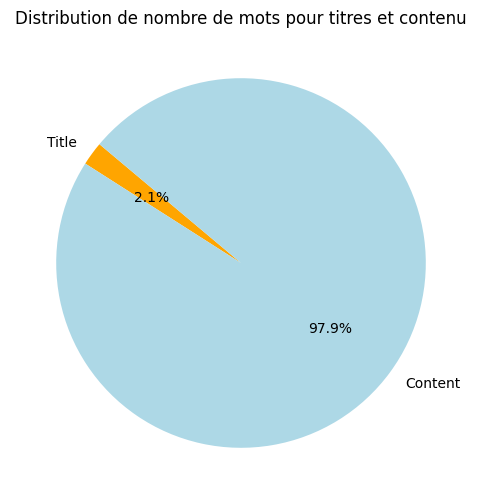

In [31]:
# counting average words of title and content
average_title_word_count = df['title_word_count'].mean()
average_content_word_count = df['content_word_count'].mean()

# Calculate total average words to get proportions for the pie chart
total_average_words = average_title_word_count + average_content_word_count
title_proportion = (average_title_word_count / total_average_words) * 100
content_proportion = (average_content_word_count / total_average_words) * 100

plt.figure(figsize=(6, 6))
plt.pie([title_proportion, content_proportion], labels=['Title', 'Content'], colors=['orange', 'lightblue'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution de nombre de mots pour titres et contenu')
plt.savefig('./plot/distribution_titre_contenu.png')
plt.show()

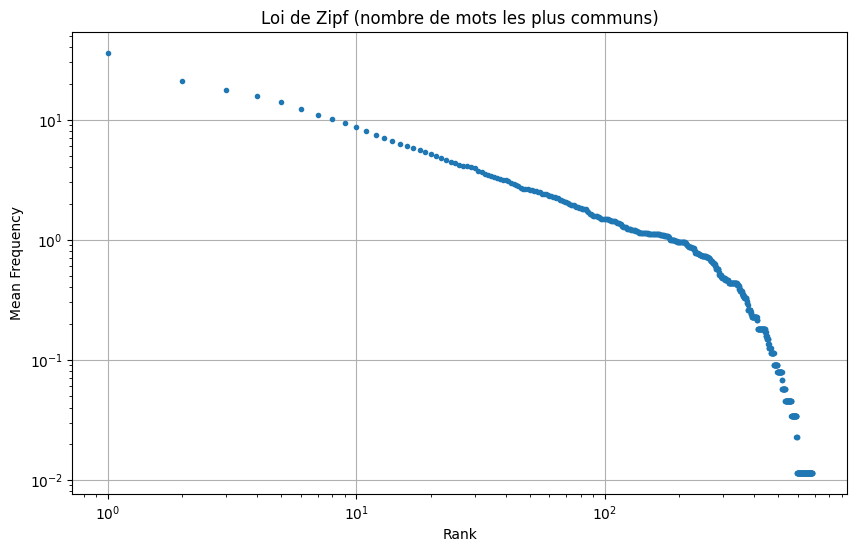

In [33]:
all_frequencies = []
for article in articles:
    words = tokenize(article)
    word_counts = Counter(words)
    sorted_counts = sorted(word_counts.values(), reverse=True)
    all_frequencies.append(sorted_counts)

# Normalize the lengths of frequency lists
max_length = max(len(freqs) for freqs in all_frequencies)
normalized_frequencies = np.zeros((len(all_frequencies), max_length))

for i, freqs in enumerate(all_frequencies):
    normalized_frequencies[i, :len(freqs)] = freqs

# Compute mean frequencies for each rank
mean_frequencies = normalized_frequencies.mean(axis=0)

# Filter out zeros to avoid visualization issues
mean_frequencies = mean_frequencies[mean_frequencies > 0]

# Visualization
ranks = range(1, len(mean_frequencies) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, mean_frequencies, marker='.', linestyle='none')
plt.xlabel('Rank')
plt.ylabel('Mean Frequency')
plt.title('Loi de Zipf (nombre de mots les plus communs)')
plt.grid(True)
plt.savefig('./plot/loi_de_zipf.png')
plt.show()
